# Importar paquetes


In [1]:
import matplotlib.pylab as plt
import networkx as nx
import pandas as pd
import numpy as np
import ndlib
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc


# Traer datos
## Importar los componentes

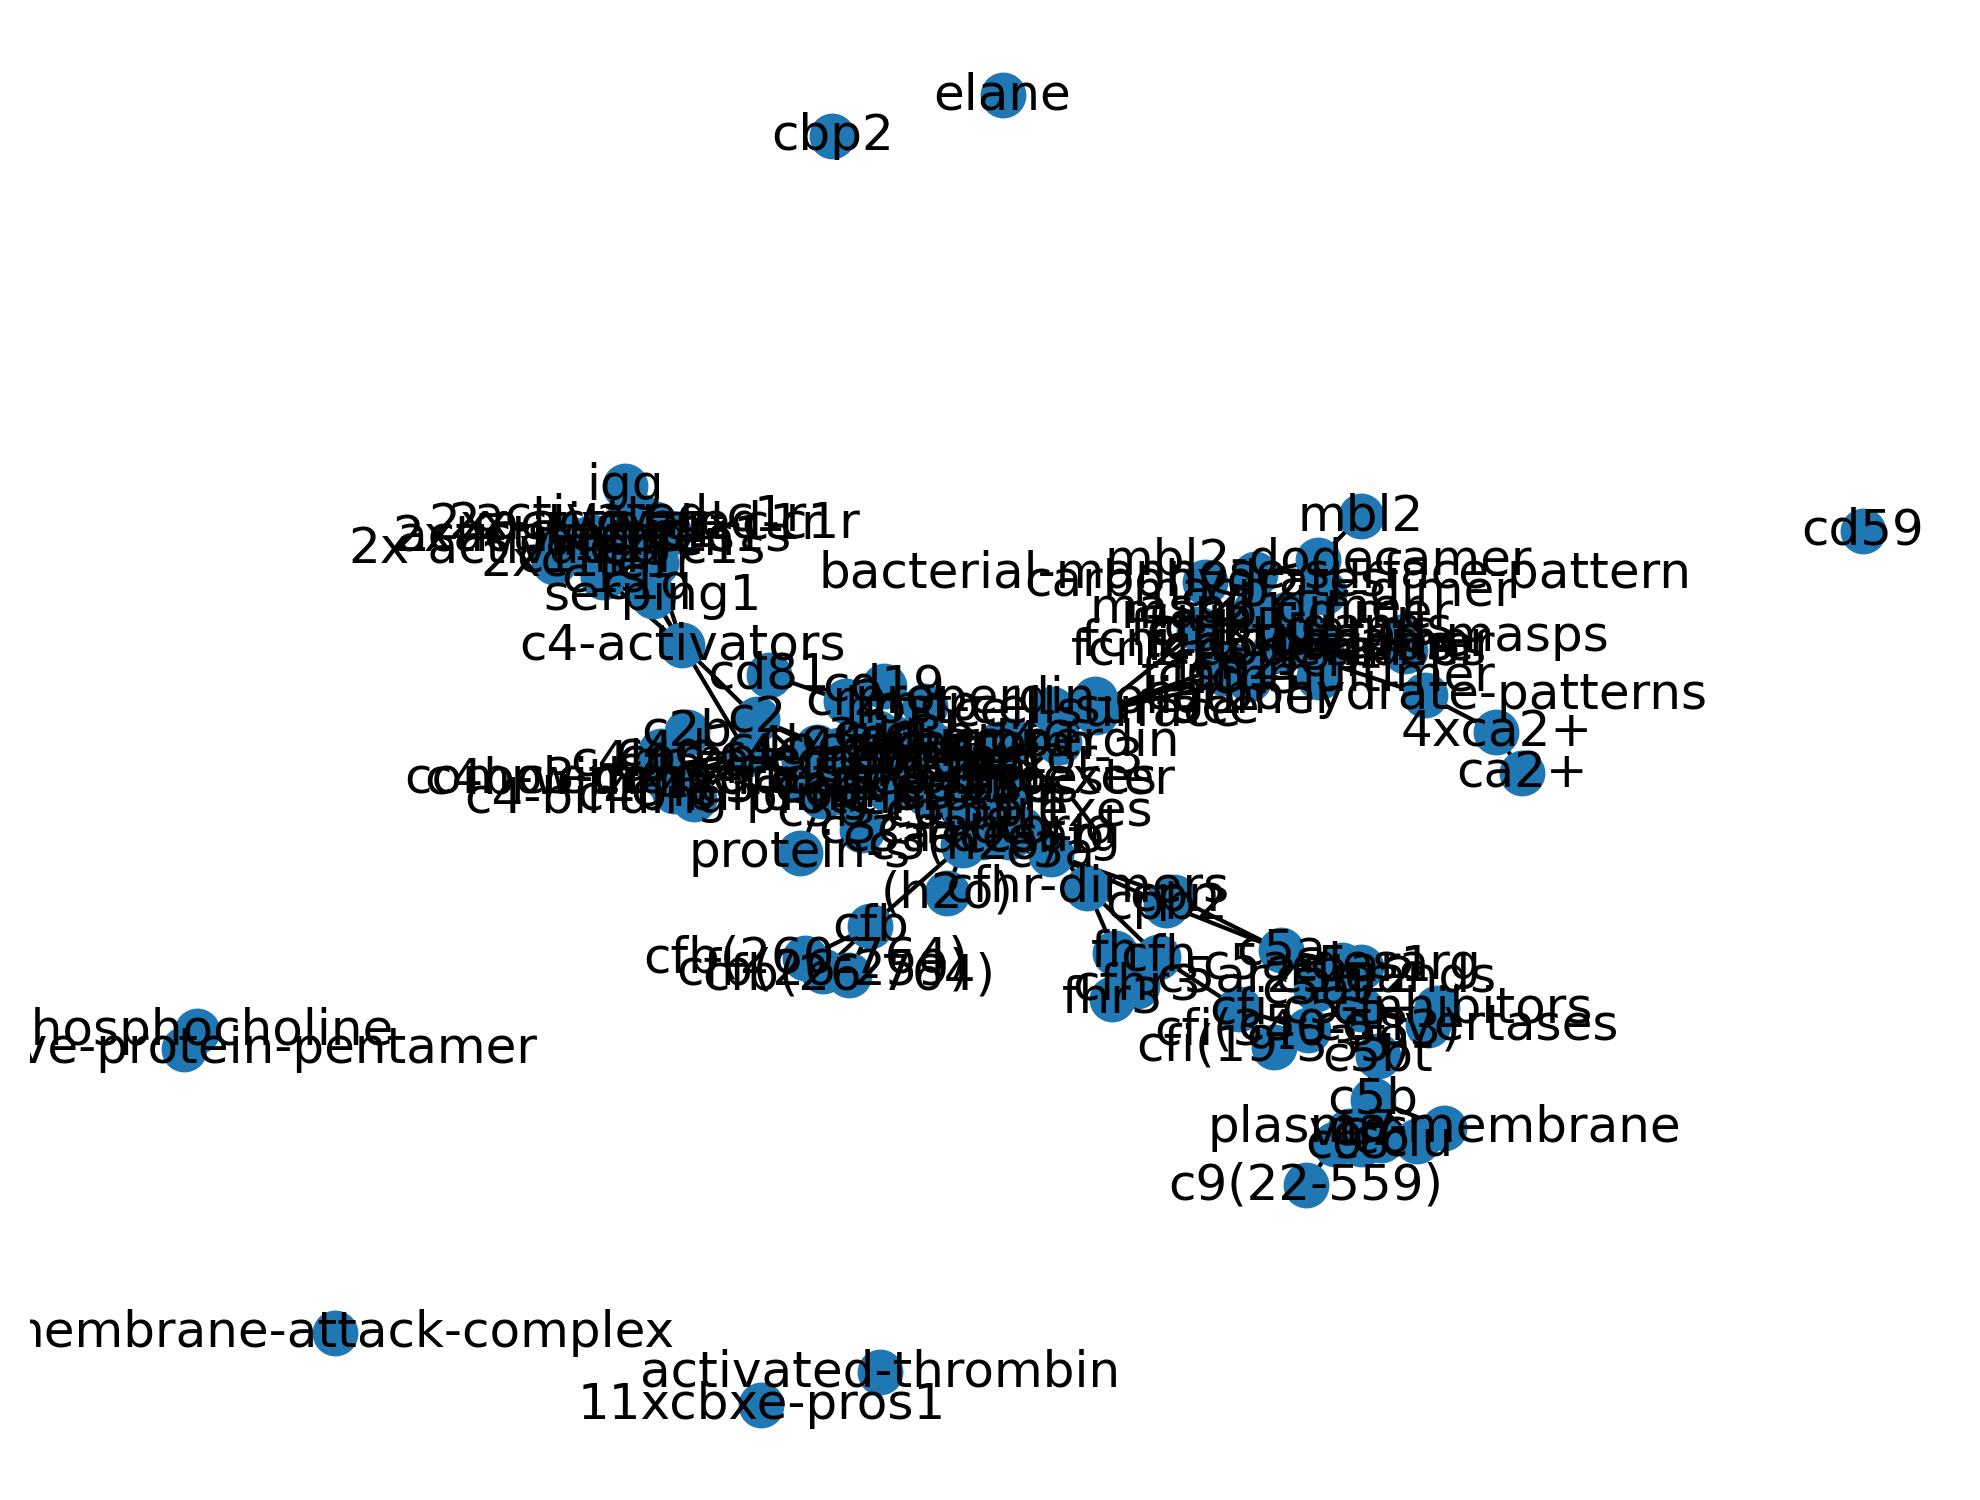

In [2]:
componentes=open("Datos_componentes3.txt",'r').read().split('\n')
componentes2=[]
conexiones_big_brother=[]

for comp in componentes:
	comp=comp.strip('-')
	componentes2.append(comp)



for ii in range(len(componentes2)):
	
	for jj in range(len(componentes2)):
		bb_exists=False
		if componentes2[jj].find(componentes2[ii])!=-1:
			bb_exists=True
			bb=componentes2[jj]
		if bb_exists:
			conexiones_big_brother.append([componentes2[ii],componentes2[jj]])
			#print(componentes2[jj],componentes2[ii],bb_exists)


		

conexiones=				open("Conexiones.txt",'r').read().split('\n')
nodos=					open("Componentes.txt",'r').read().split('\n')
conexiones_implicitas=	open("Conexiones_implicitas.txt",'r').read().split('\n')

G=nx.Graph()

for nodo in nodos:
	G.add_node(nodo)
	
for conexion in conexiones:
	elementos=conexion.split(',')
	if G.has_node(elementos[0]) and G.has_node(elementos[1]):
		G.add_edge(elementos[0],elementos[1])
	else:
		print('----------- no esta -----------\n',elementos)
for conexion in conexiones_big_brother:
	if G.has_node(elementos[0]) and G.has_node(elementos[1]):
		G.add_edge(conexion[0],conexion[1])
	else:
		print('----------- no esta -----------\n',conexion)



for conex_implicita in conexiones_implicitas:
	elementos=conex_implicita.split(',')
	#print(elementos)
	if G.has_node(elementos[0]) and G.has_node(elementos[1]):
		#print(elementos)
		G.add_edge(elementos[0],elementos[1])
	else:
		print('----------- no esta -----------\n',elementos)

	

plt.figure(dpi=300)
G.remove_edges_from(nx.selfloop_edges(G))
nx.draw(G,with_labels=True,node_size=100)

## Limpiar el grafo

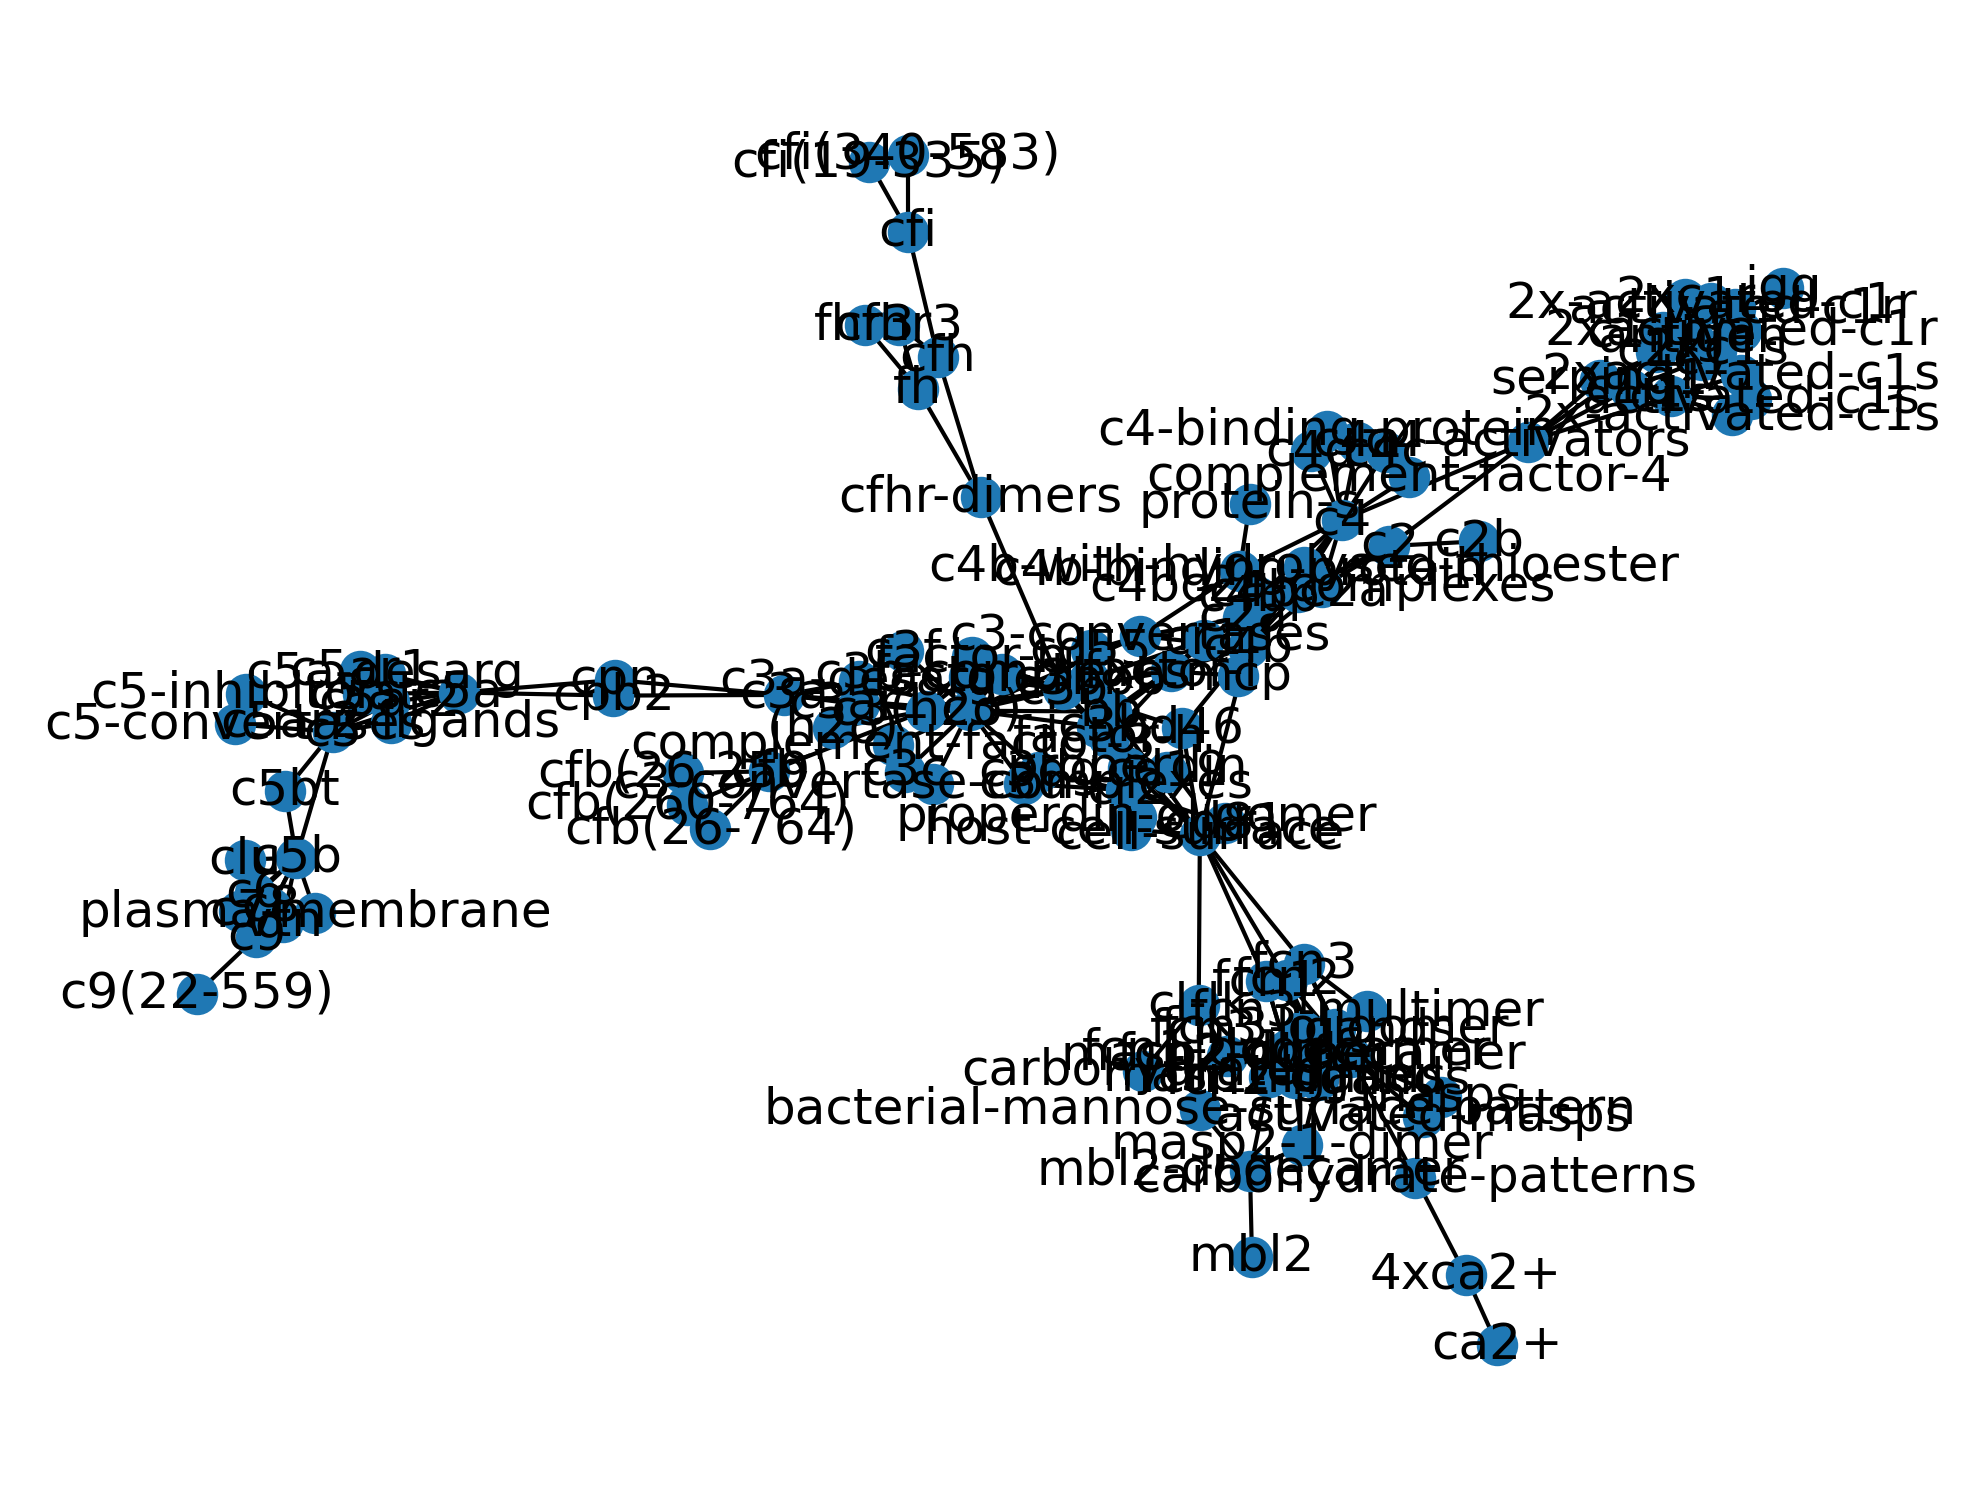

In [3]:
Label=True
plt.figure(dpi=300)
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
G_base=G0.copy()
nx.draw(G0, with_labels=Label,node_size=80)

# Medidas basicas
## Nodos y lineas

In [4]:
Nodos=G_base.nodes()
Edges=G_base.edges()
Num_nodos=len(Nodos)
Num_connections=len(Edges)
print(f'Numero de nodos: {Num_nodos}\nNumero de conecciones: {Num_connections}')

Numero de nodos: 123
Numero de conecciones: 242


## Grado

Grado promedio es 3.934959349593496


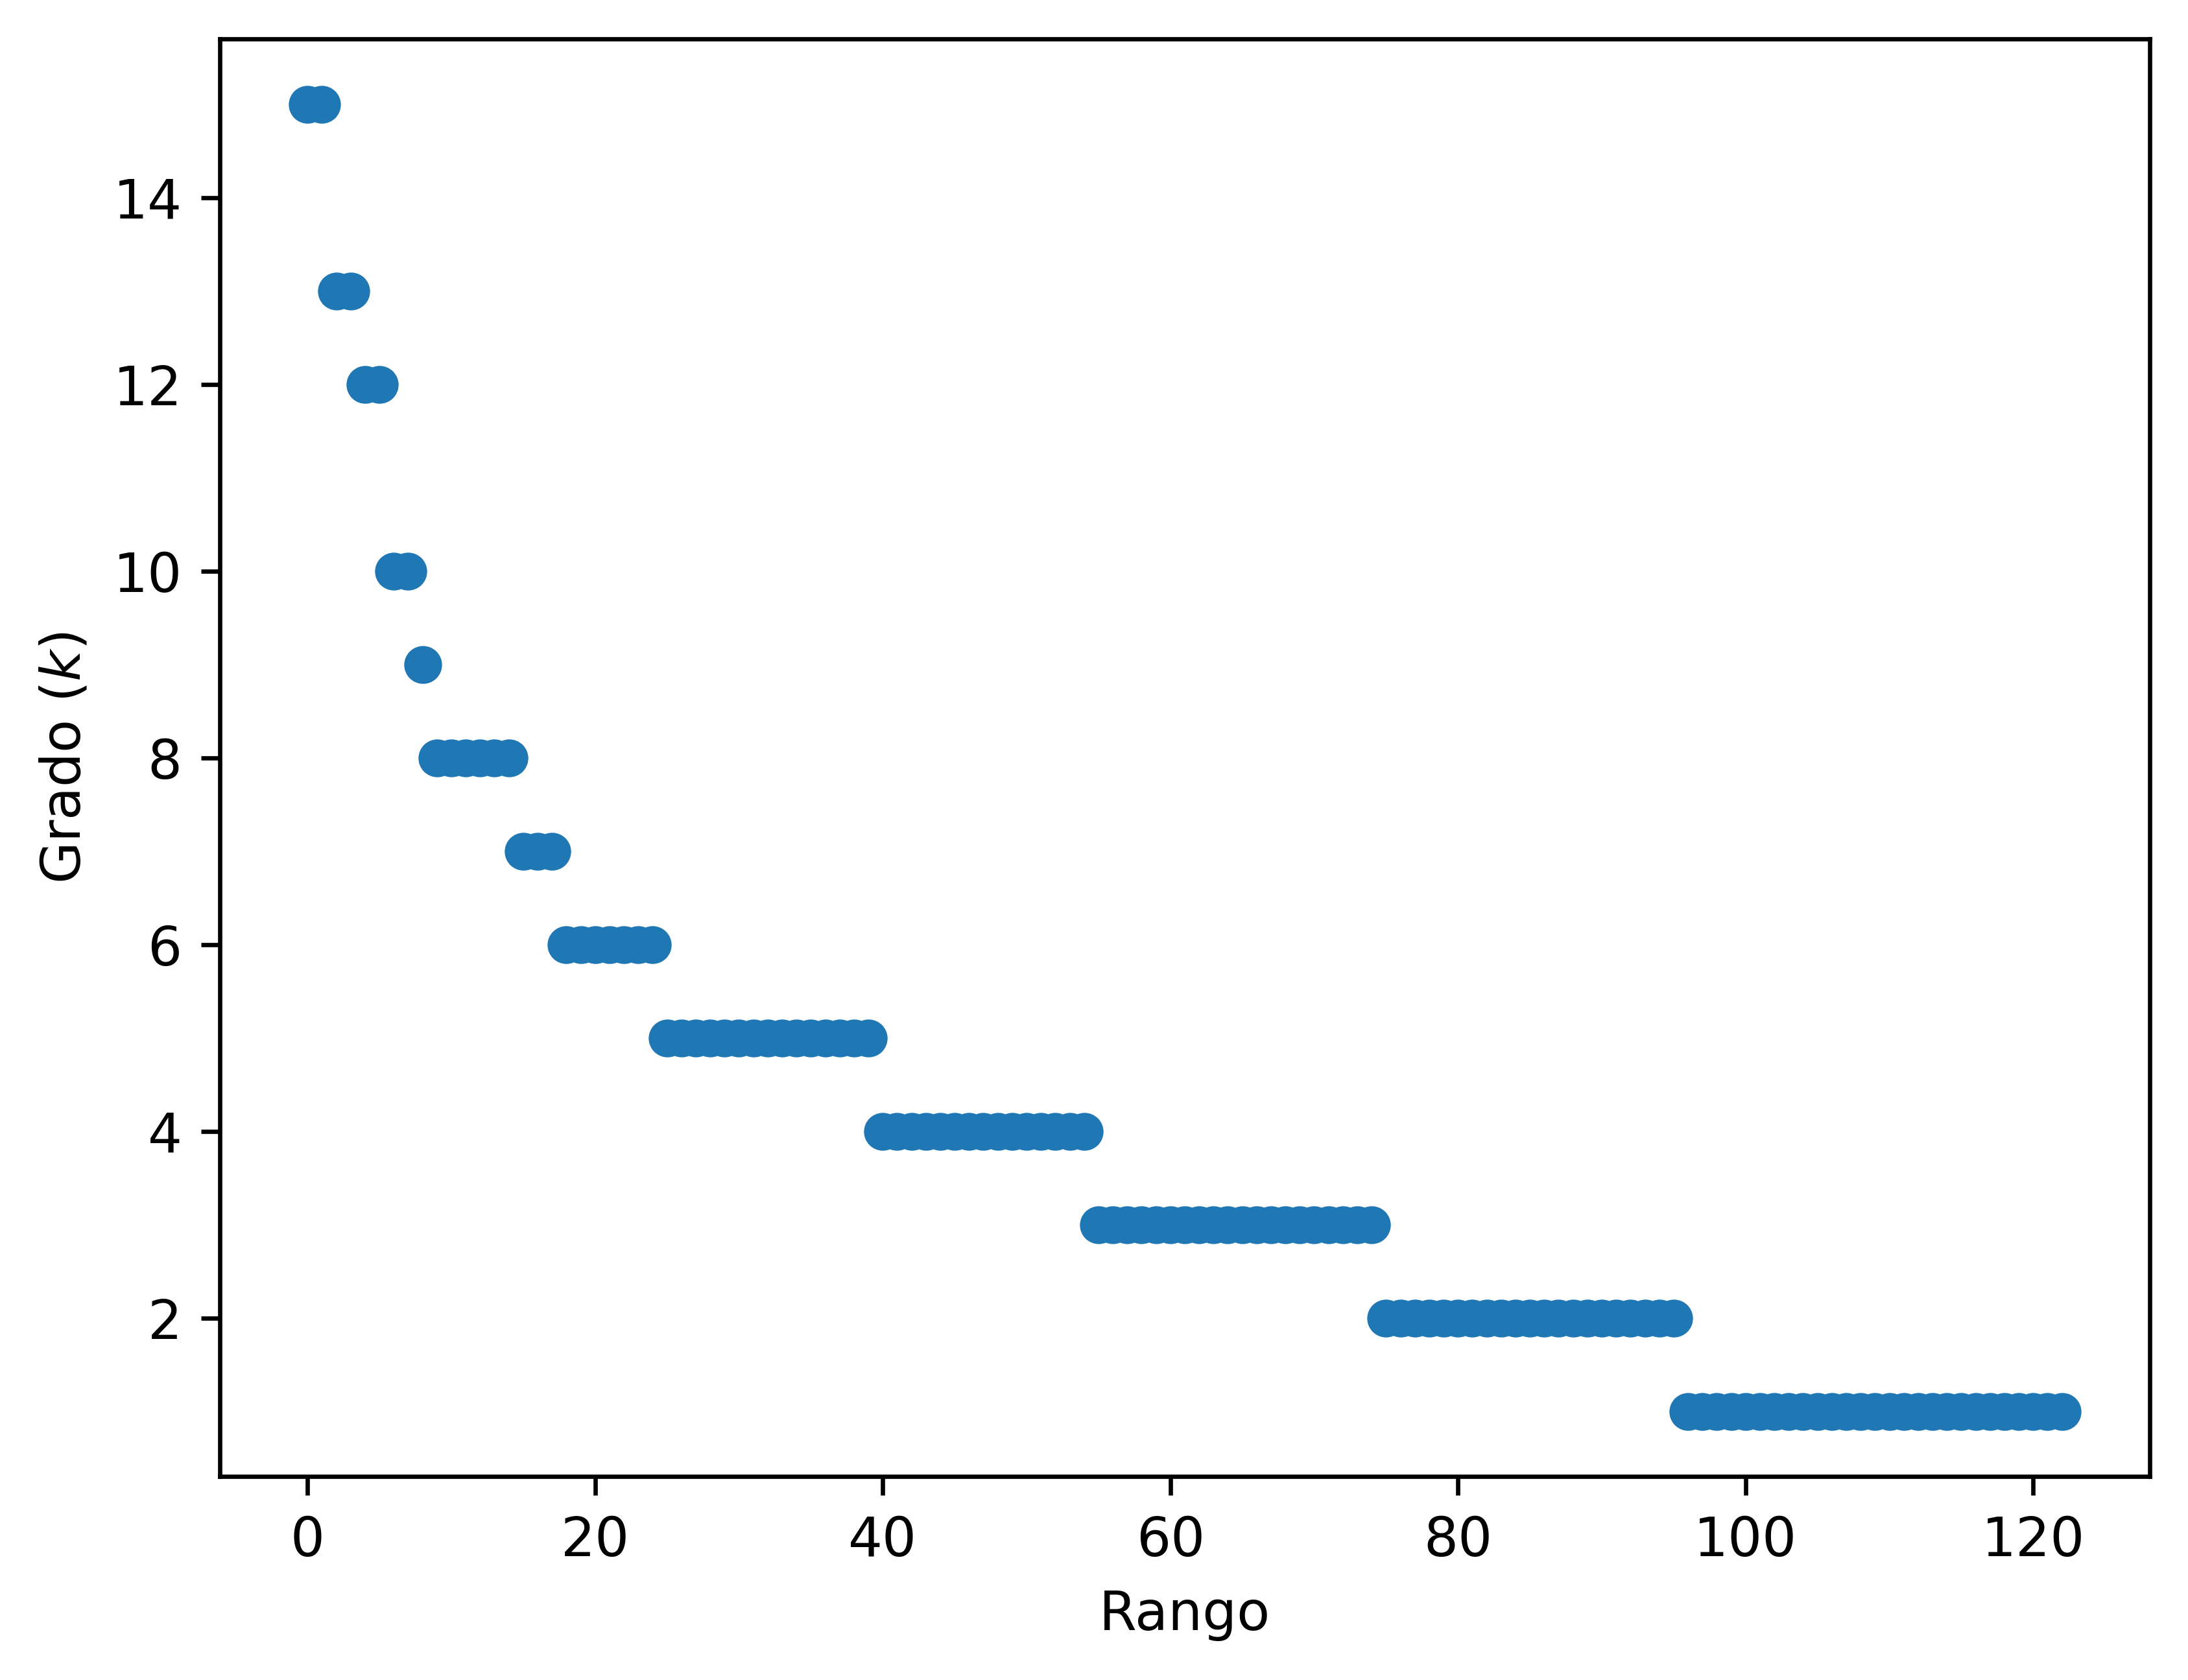

In [5]:
degree_sequence = sorted((d for n, d in G_base.degree()), reverse=True)
# print(degree_sequence)
plt.figure(dpi=600)
plt.scatter(np.arange(len(degree_sequence)),degree_sequence)
plt.ylabel("Grado $(k)$")
plt.xlabel("Rango")
print(f"Grado promedio es {np.average(degree_sequence)}")

## Matriz

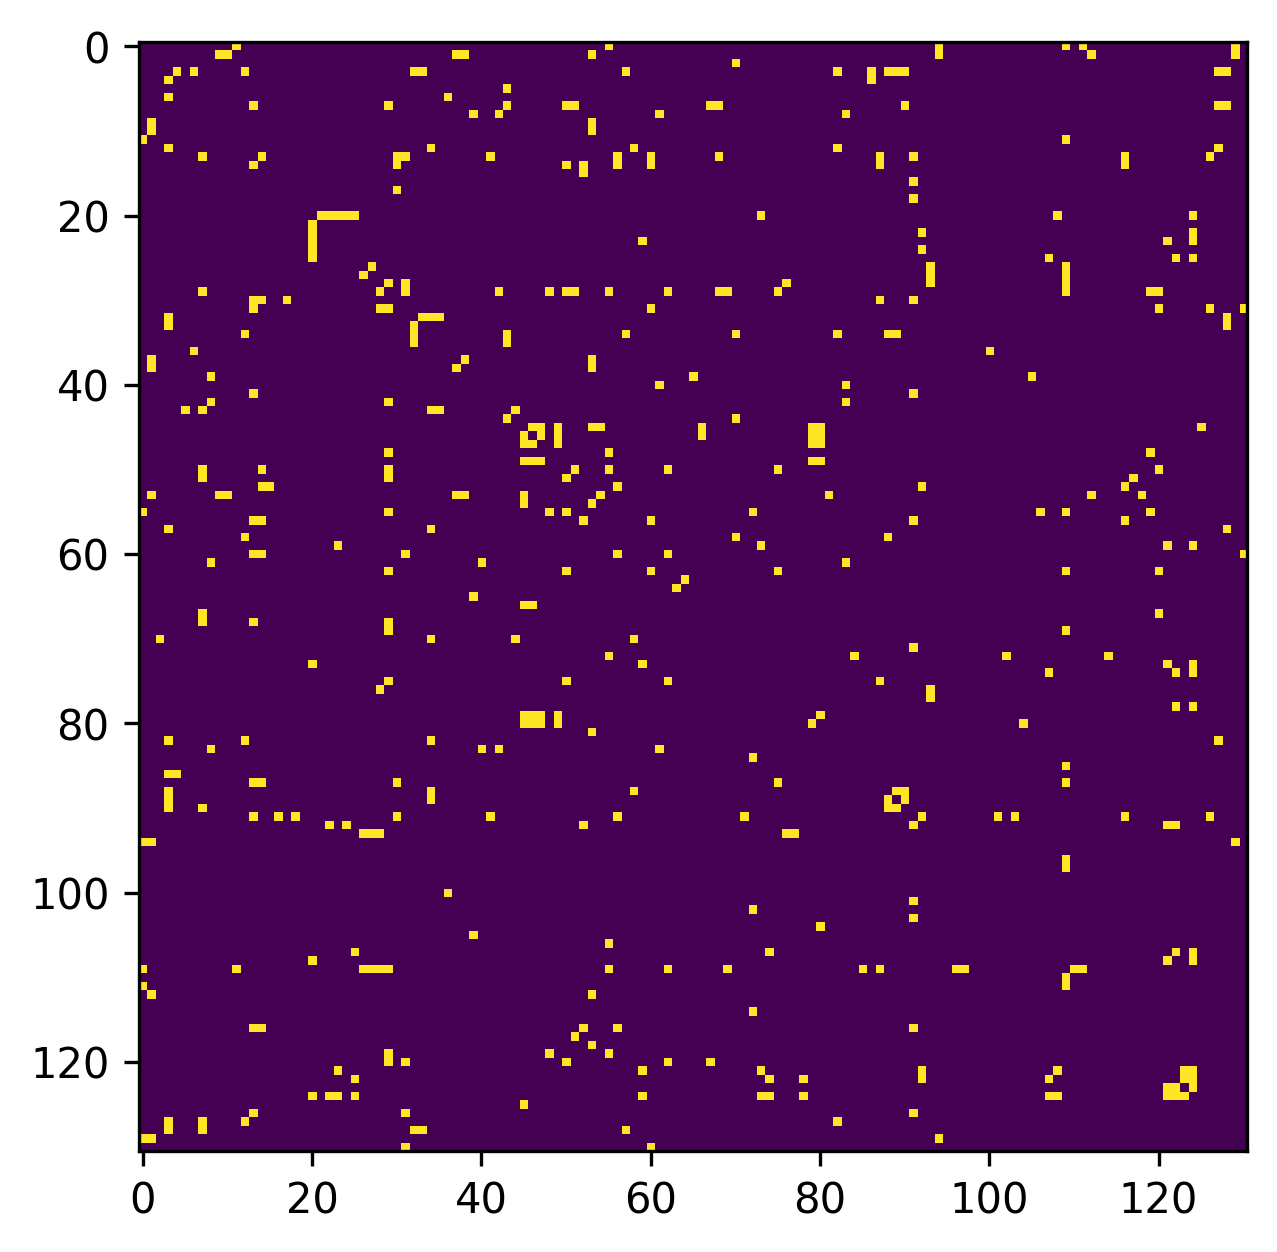

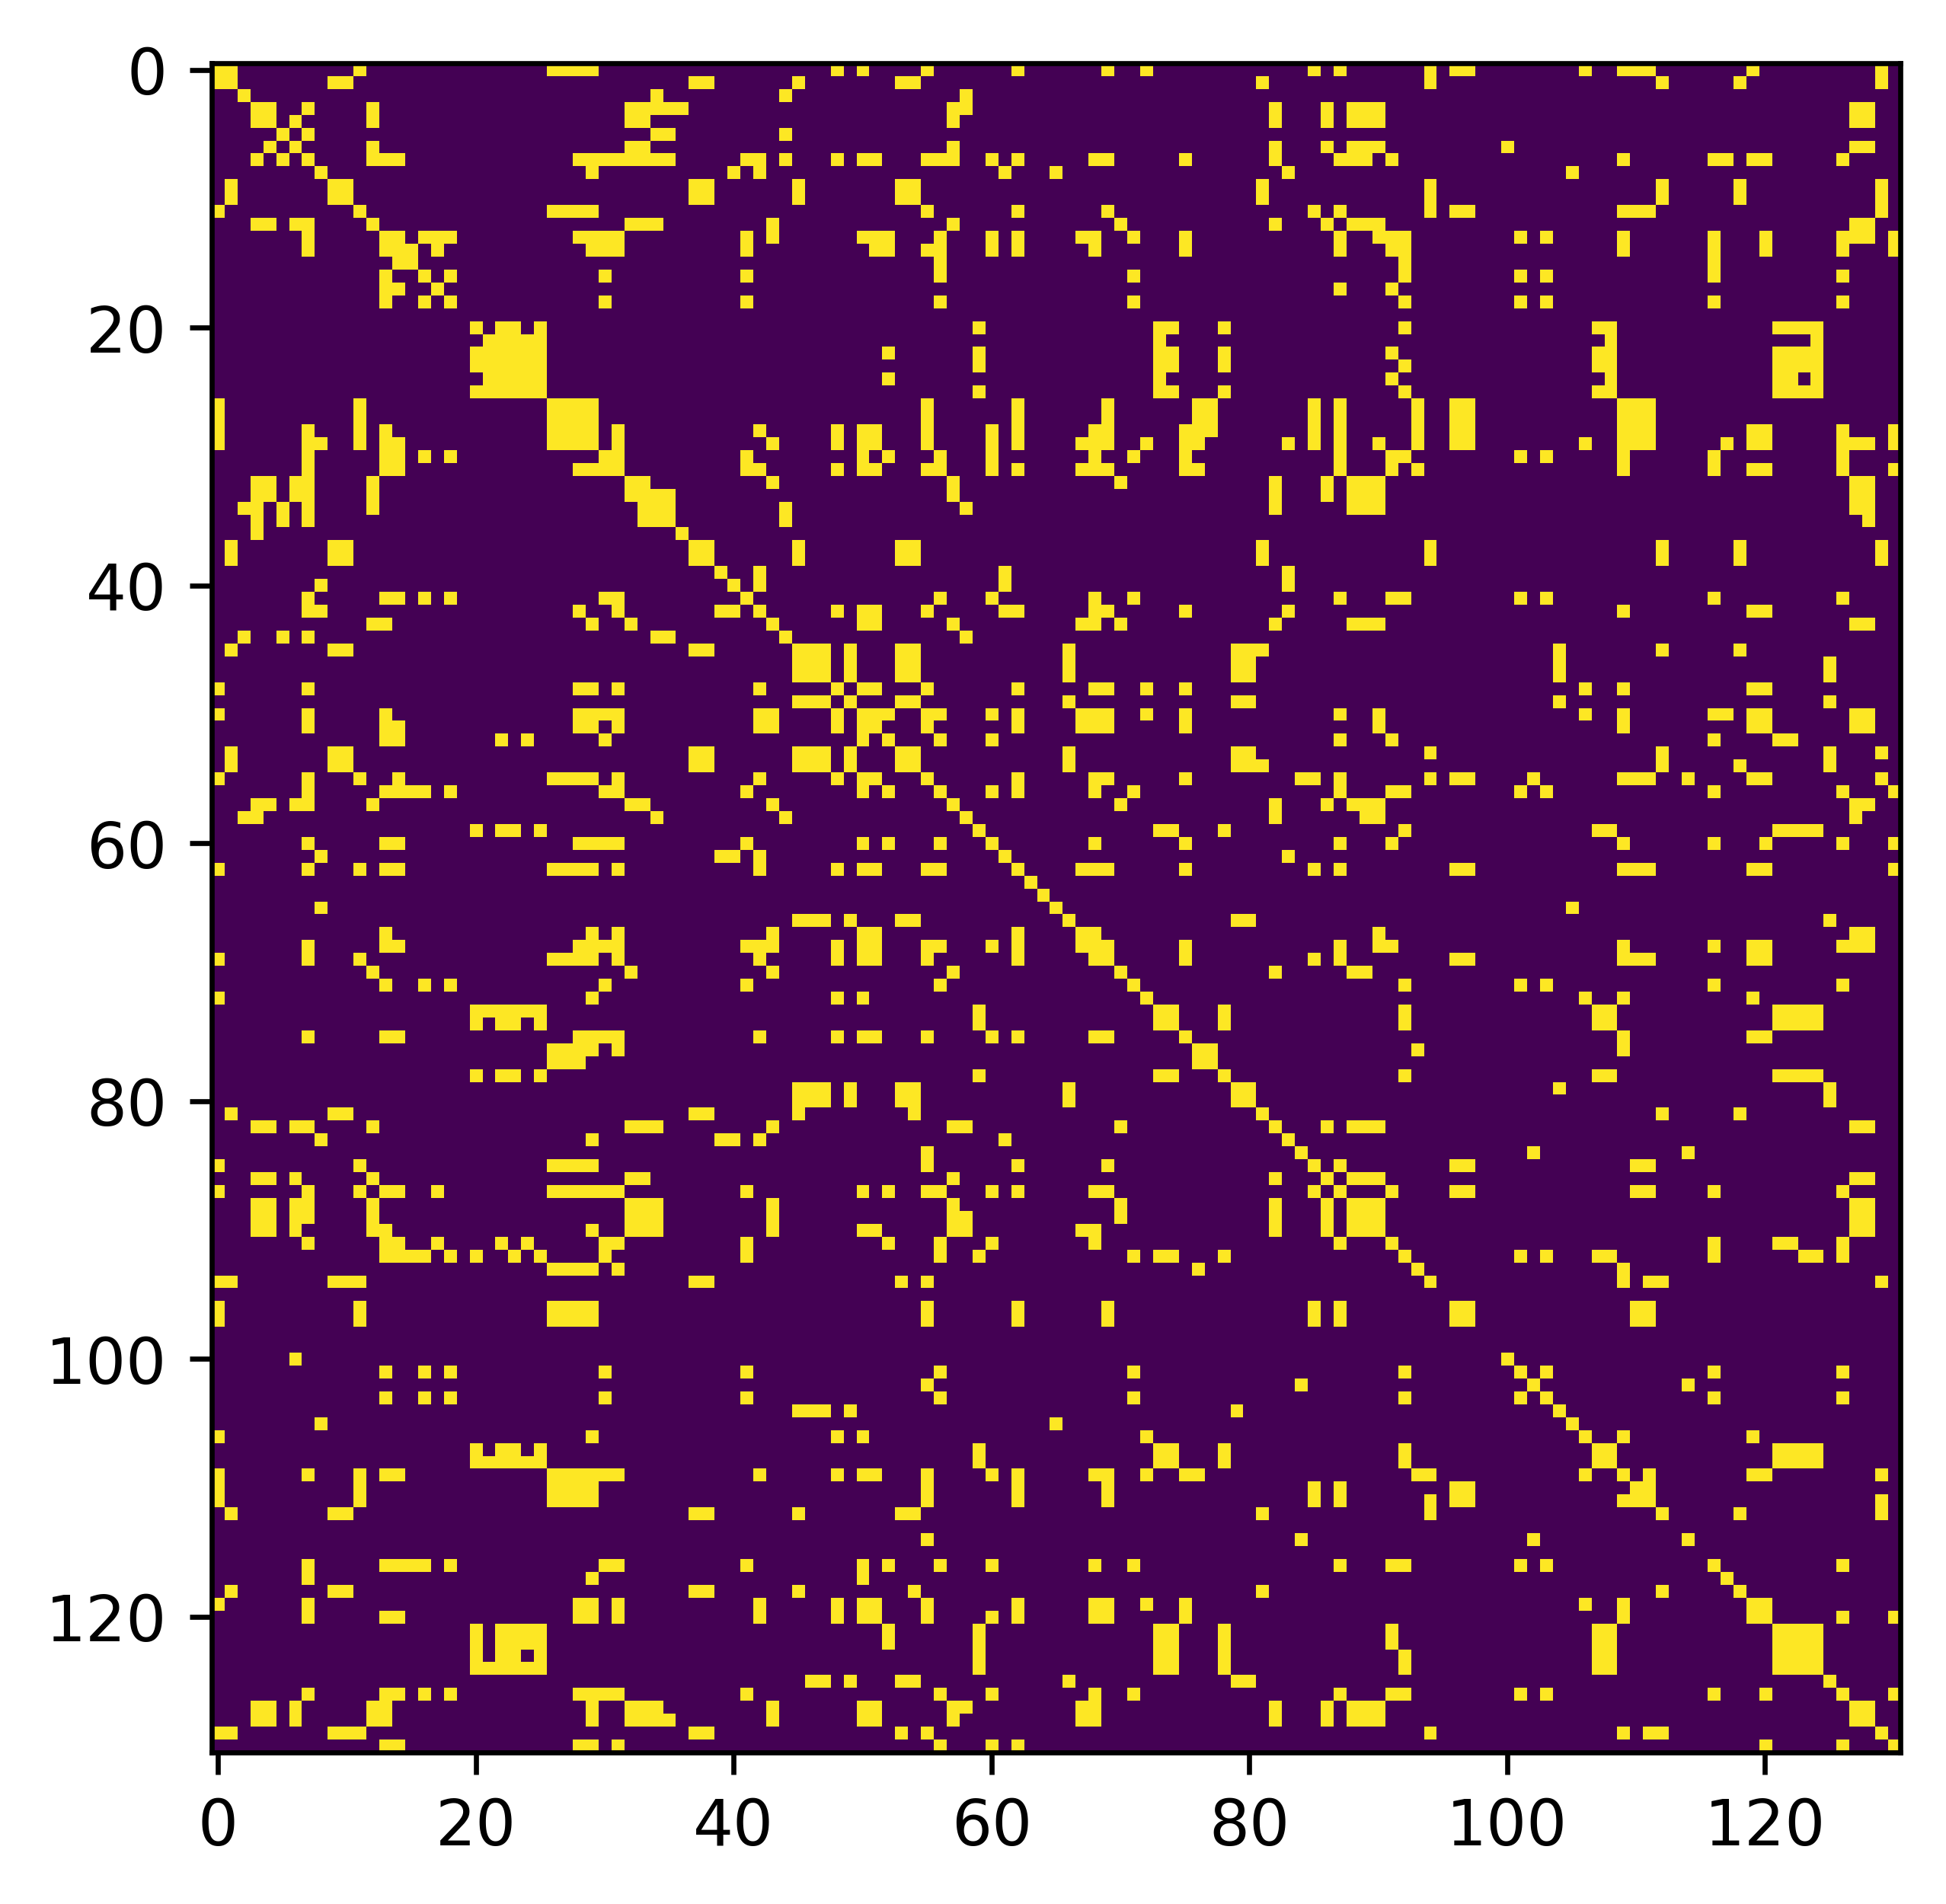

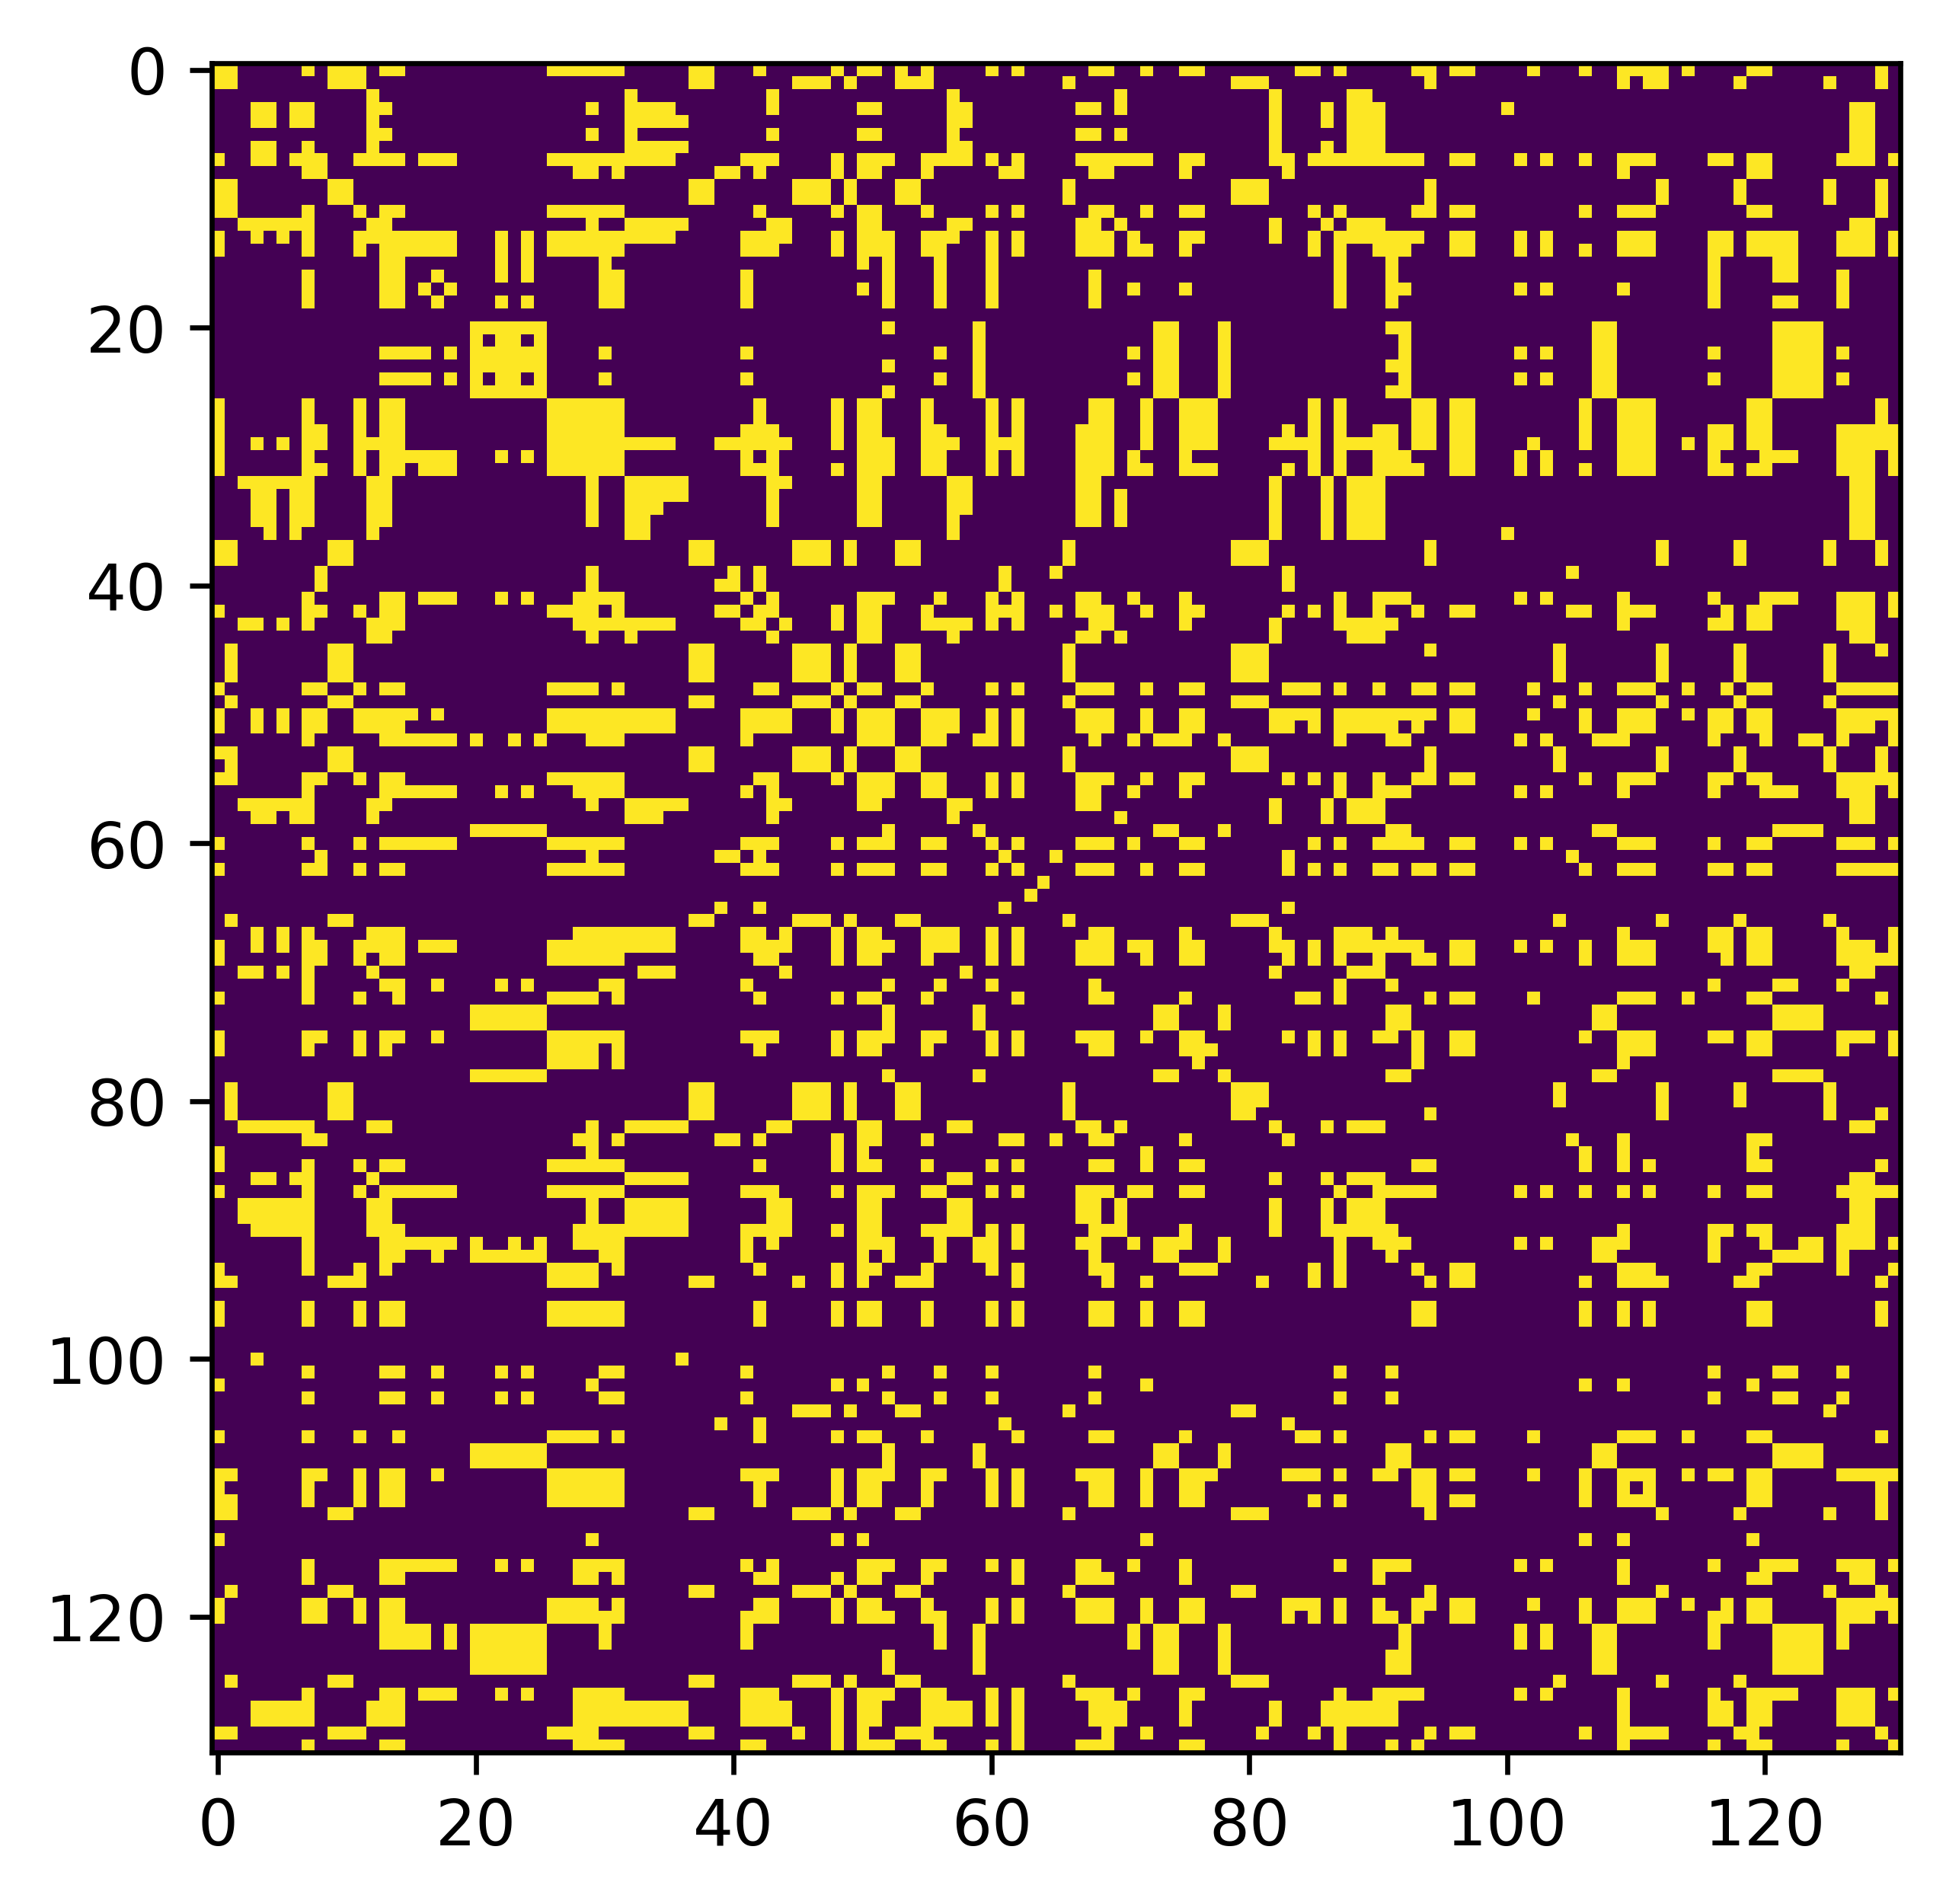

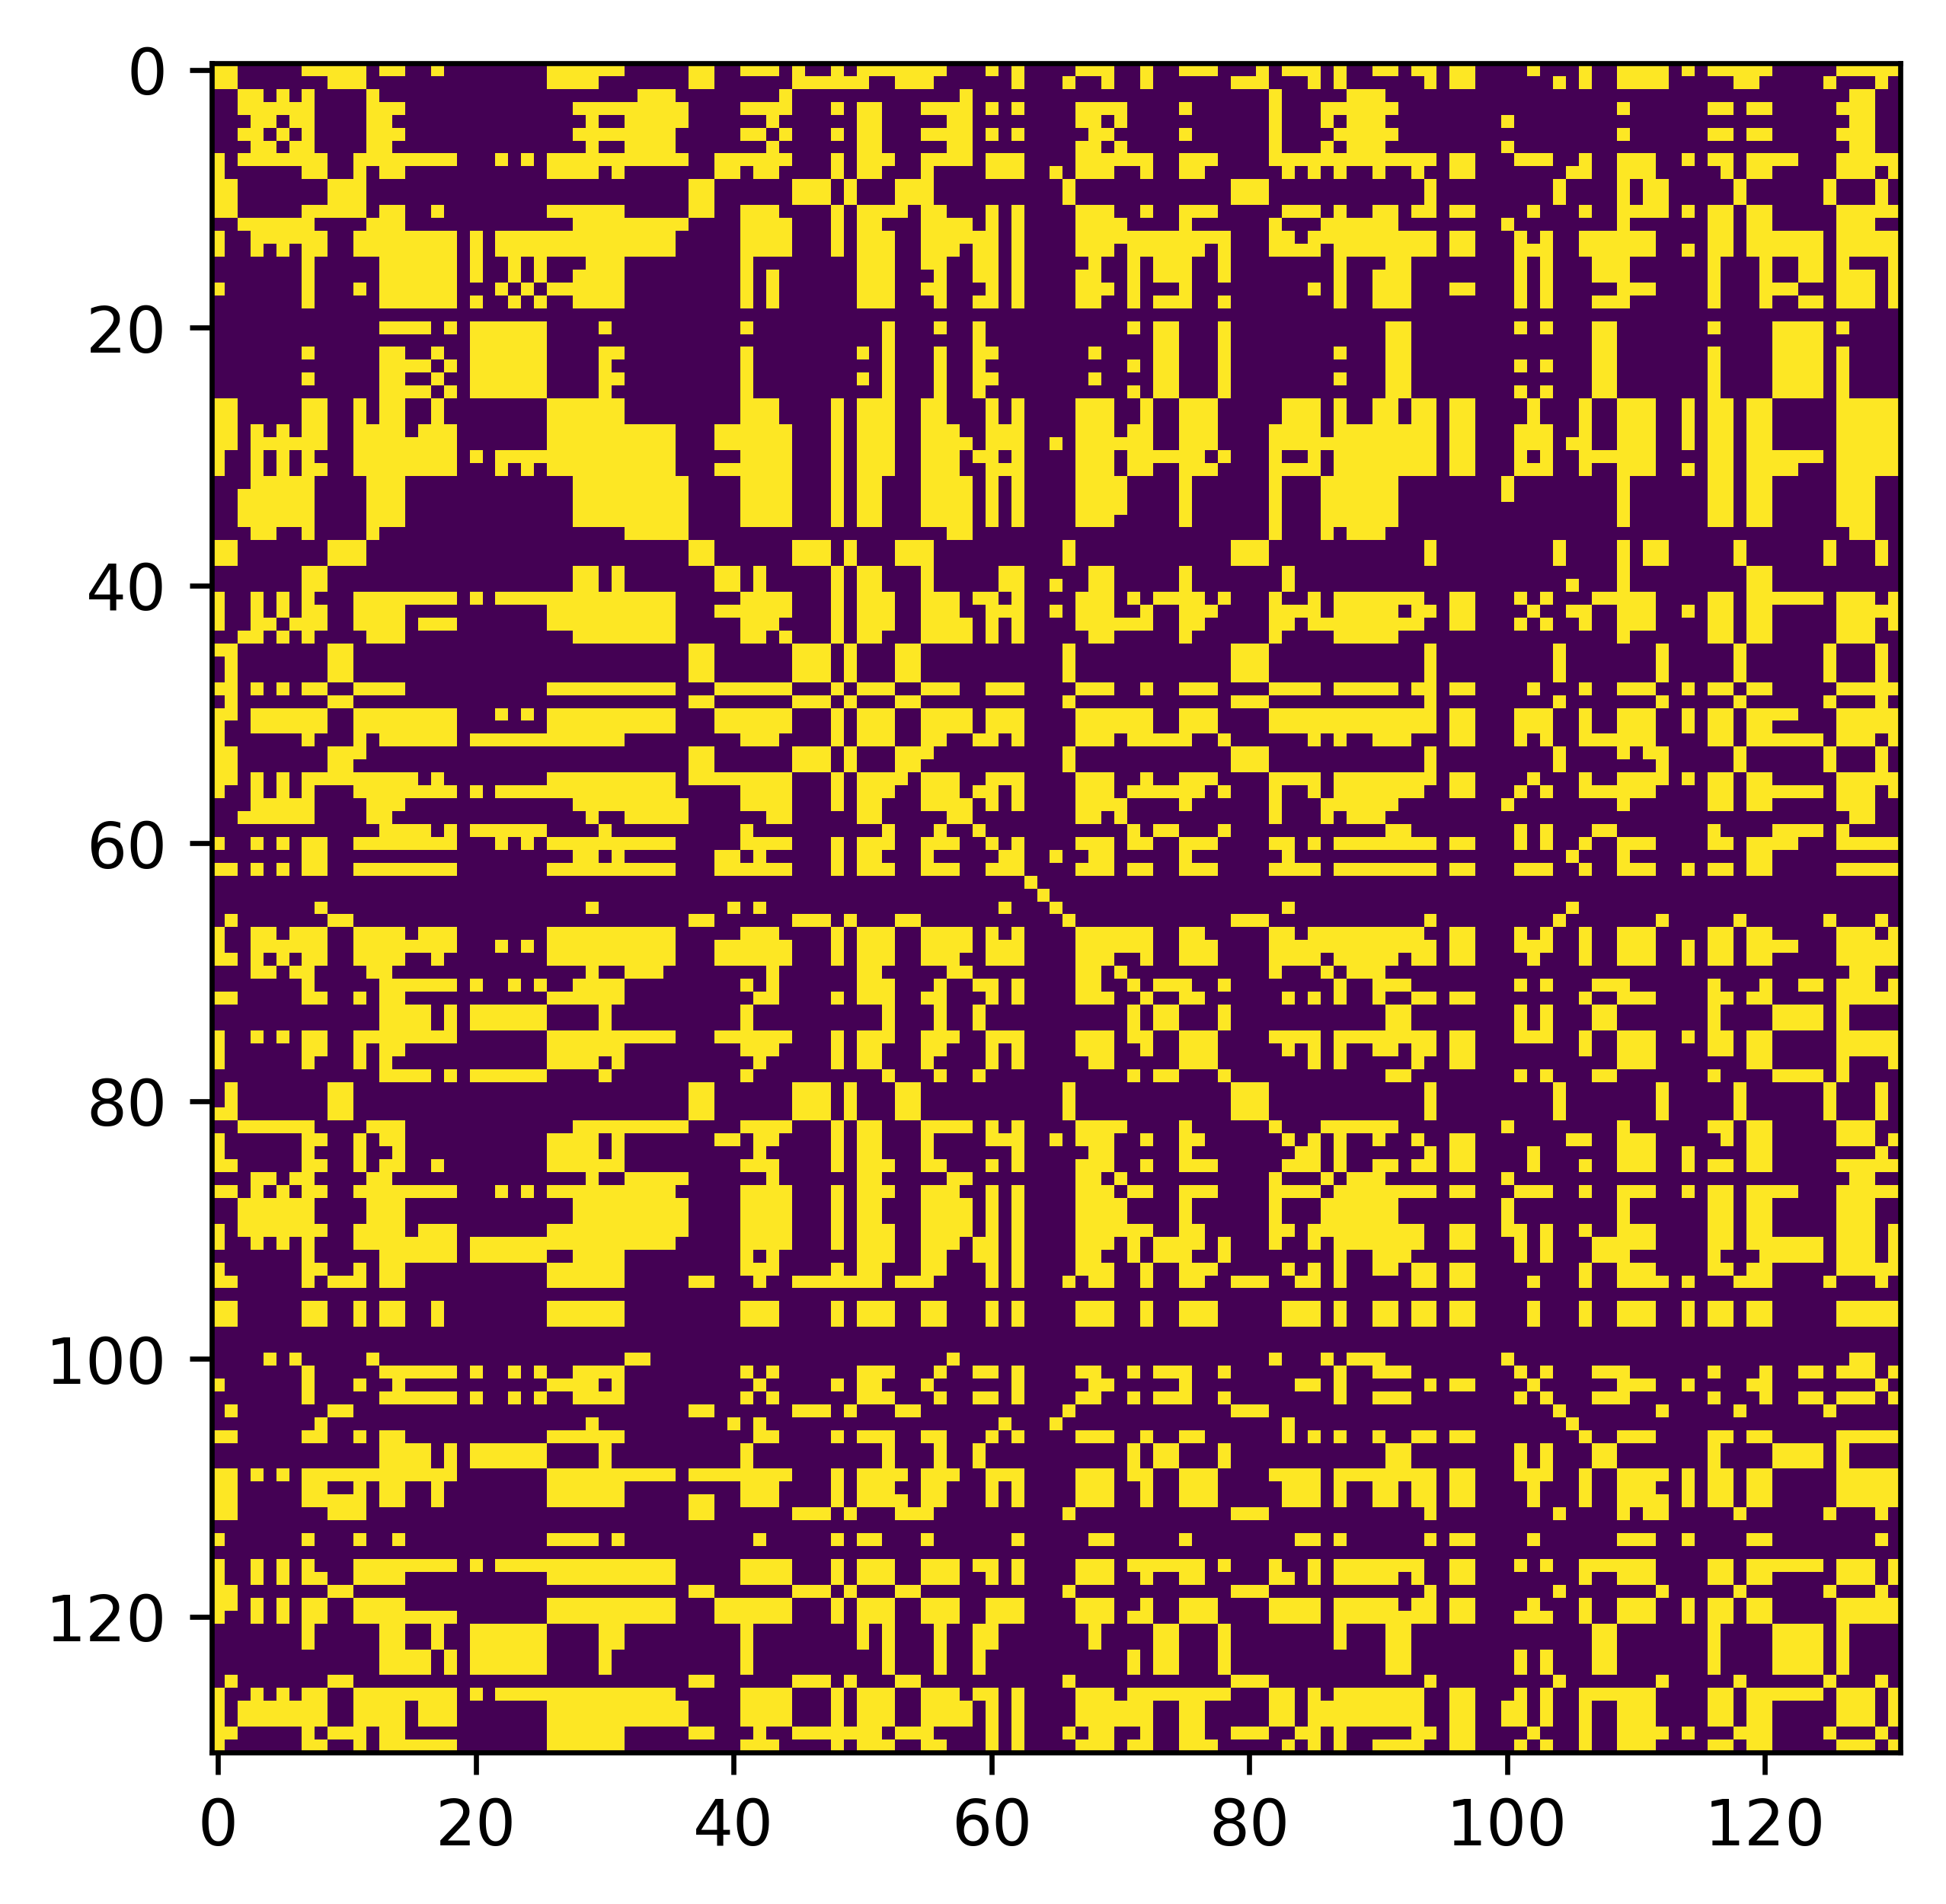

In [6]:
SP=nx.adjacency_matrix(G,weight=None).toarray()
plt.figure(dpi=300)
plt.imshow(SP)

SP2=np.matmul(SP,SP)
plt.figure(dpi=600)
plt.imshow(SP2,vmax=1)
plt.show()
plt.close()
SP3=np.matmul(SP2,SP)
plt.figure(dpi=600)
plt.imshow(SP3,vmax=1)
plt.show()
plt.close()
SP4=np.matmul(SP2,SP2)
plt.figure(dpi=600)
plt.imshow(SP4,vmax=1)

# Ataque
## Funciones del ataque

In [35]:
def sort_dict_value(dic):    
    return sorted(dic.items(), key=lambda x:x[1])

def biggest_betweenness(G,max=None):
    b=nx.betweenness_centrality(G)
    b2=sort_dict_value(b)
    #print(b2[len(b2)-1])
    if max==None:
        return b2[len(b2)-1]
    return b2[len(b2)-max:len(b2)-1]

def biggest_degree(G,max=None):

    b=dict(G.degree())
    b2=sort_dict_value(b)
    if max==None:
        return b2[len(b2)-1]
    return b2[len(b2)-max:len(b2)-1]

def biggest_strength(G):

    b=dict(G.degree(weight="weight"))
    b2=sort_dict_value(b)
    return b2[len(b2)-1][0]

def biggest_clustering(G):

    b=nx.clustering(G)
    b2=sort_dict_value(b)
    return b2[len(b2)-1][0]

def alcanza(g):
    dic=dict(nx.all_pairs_shortest_path_length(g))
    nodos=list(g.nodes())
    nodos.sort()
    #print(dic)
    Alcanza=[]
    for nodo in nodos:
        reach=0
        for nodo2 in nodos:
            if nodo!=nodo2:
                try:
                    t=dic[nodo][nodo2]
                    reach+=1
                except:
                    pass
        Alcanza.append([nodo,reach])
    return Alcanza

def alcanza_p(g):
    dic=dict(nx.all_pairs_shortest_path_length(g))
    nodos=list(g.nodes())
    nodos.sort()
    #print(dic)
    Alcanza=[]
    for nodo in nodos:
        reach=0
        for nodo2 in nodos:
            if nodo!=nodo2:
                try:
                    t=dic[nodo][nodo2]
                    reach+=G.degree(nodo)+G.degree(nodo)
                except:
                    pass
        Alcanza.append([nodo,reach])
    return Alcanza

def avg_alcanza(L):
    v=np.zeros(len(L))

    for i in range(len(L)):
        v[i]=L[i][1]  

    return np.average(v) 

def ataque_rand(G):
    #print("entra")
    Alcanza_ataque=np.zeros((len(list(G.nodes()))))
    H=alcanza_p(G)
    avg_h=avg_alcanza(H)
    Alcanza_ataque[0]=avg_h
    for i in range(len(list(G.nodes()))-1):
        nodos=list(G.nodes())
        target=nodos[np.random.randint(0,len(nodos))]    
        G.remove_node(target)
        H=alcanza_p(G)
        avg_h=avg_alcanza(H)
        Alcanza_ataque[i+1]=avg_h
        #print(len(nodos),avg_h)
    return np.array(Alcanza_ataque)

def ataque_between(G):
    Alcanza_ataque=np.zeros((len(list(G.nodes()))))
    H=alcanza_p(G)
    avg_h=avg_alcanza(H)
    Alcanza_ataque[0]=avg_h
    for i in range(len(list(G.nodes()))-1):
        nodos=list(G.nodes())
        target=biggest_betweenness(G)    
        G.remove_node(target)
        H=alcanza_p(G)
        avg_h=avg_alcanza(H)
        Alcanza_ataque[i+1]=avg_h
        #print(len(nodos),avg_h)
        
    return np.array(Alcanza_ataque)

def ataque_degree(G):
    Alcanza_ataque=np.zeros((len(list(G.nodes()))))
    H=alcanza_p(G)
    avg_h=avg_alcanza(H)
    Alcanza_ataque[0]=avg_h
    for i in range(len(list(G.nodes()))-1):
        nodos=list(G.nodes())
        target=biggest_degree(G)    
        G.remove_node(target)
        H=alcanza_p(G)
        avg_h=avg_alcanza(H)
        Alcanza_ataque[i+1]=avg_h
        #print(len(nodos),avg_h)
        
    return np.array(Alcanza_ataque)

def ataque_strength(G):
    Alcanza_ataque=np.zeros((len(list(G.nodes()))))
    H=alcanza_p(G)
    avg_h=avg_alcanza(H)
    Alcanza_ataque[0]=avg_h
    for i in range(len(list(G.nodes()))-1):
        nodos=list(G.nodes())
        target=biggest_strength(G)    
        G.remove_node(target)
        H=alcanza_p(G)
        avg_h=avg_alcanza(H)
        Alcanza_ataque[i+1]=avg_h
        #print(len(nodos),avg_h)
        
    return np.array(Alcanza_ataque)

def ataque_clustering(G):
    Alcanza_ataque=np.zeros((len(list(G.nodes()))))
    H=alcanza_p(G)
    avg_h=avg_alcanza(H)
    Alcanza_ataque[0]=avg_h
    for i in range(len(list(G.nodes()))-1):
        nodos=list(G.nodes())
        target=biggest_clustering(G)    
        G.remove_node(target)
        H=alcanza_p(G)
        avg_h=avg_alcanza(H)
        Alcanza_ataque[i+1]=avg_h
        #print(len(nodos),avg_h)
        
    return np.array(Alcanza_ataque)

def ataque_rand_edges(G):
    Alcanza_ataque=np.zeros((len(list(G.edges()))))

    for i in range(len(list(G.edges))):
        k=list(G.edges())
        u=np.random.randint()
        edge=k[u]
        G.remove_edge(edge[0],edge[1])
        H=alcanza_p(G)
        avg_h=avg_alcanza(H)
        Alcanza_ataque[i+1]=avg_h
    return np.array(Alcanza_ataque)

def ataque_degree_edges(G):
    Alcanza_ataque=np.zeros((len(list(G.edges()))))
    H=alcanza(G)
    avg_h=avg_alcanza(H)
    Alcanza_ataque[0]=avg_h
    for i in range(len(list(G.edges()))-1):
        nodos=list(G.nodes())
        target=biggest_degree(G) 
        edges=list(G.edges(target))
        # print(len(list(G.edges())))
        target_edge=edges[np.random.randint(0,len(list(edges)))]
        # print(edges,target_edge)
        G.remove_edge(target_edge[0],target_edge[1])
        # print(Degree)
        H=alcanza(G)
        # print(H)
        avg_h=avg_alcanza(H)
        Alcanza_ataque[i+1]=avg_h

    return np.array(Alcanza_ataque)


        
    

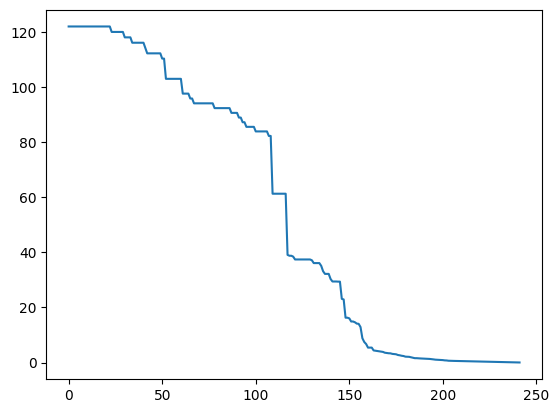

In [8]:
G2=G_base.copy()
o=ataque_degree_edges(G2)
# print(o)
plt.plot(o)
plt.show()
plt.close()


# Analisis difusion

## Activacion desde c5 y c5a

In [38]:




%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.utils import multi_runs


def modelo(G_base,q,titulo=None,x=None,y=None,filename=None,target_list=['c5','c5a']):

    if titulo==None:
        titulo=str(q)

    model = ep.IndependentCascadesModel(G_base)
    # print(json.dumps(model.parameters, indent=2))
    # Model Configuration
    config = mc.Configuration()
    config.add_model_parameter('fraction_infected', 0.01)

    # Setting the edge parameters
    threshold = 0.1
    for e in G_base.edges():
        config.add_edge_configuration("threshold", e, threshold)

    model.set_initial_status(config)



    targets=target_list
    num_it=30
    infection_sets = []

    for i in range(num_it):
        infection_sets.append(targets)

    trends = multi_runs(model, execution_number=num_it, iteration_number=100, infection_sets=infection_sets, nprocesses=4)
    viz = DiffusionTrend(model, trends)
    viz.normalized=False
    viz.title=titulo
    viz.ylabel="Numero de nodos"
    if filename==None:
        f'difusion/imagen{q}'

    viz.plot(filename=filename,percentile=80,yline=y,xline=x, No_removed=True,Labels=["No activados","Activados"])

def nodo_mimetico(G,i):
    edges=list(G.edges())

    nodo_m=f'nodo_f_{i}'

    G.add_node(nodo_m)

    target_edge=edges[np.random.randint(0,len(edges))]

    G.remove_edge(target_edge[0],target_edge[1])
    G.add_edge(target_edge[0],nodo_m)

def nodo_mimetico_degree(G,i):
    edges=list(G.edges())

    nodo_m=f'nodo_f_{i}'
    G.add_node(nodo_m)
    # print(type(biggest_degree(G,14)),biggest_degree(G,14))
    L1=np.random.randint(0,13)
    nodos=biggest_degree(G,14)
    nodo_target=nodos[L1]
    #print(nodo_target,len(nodos),L1)
    edges=list(G.edges(nodo_target))

    target_edge=edges[np.random.randint(0,len(edges))]

    G.remove_edge(target_edge[0],target_edge[1])
    G.add_edge(target_edge[0],nodo_m)


def nodo_mimetico_betweenes(G,i):

    nodo_m=f'nodo_f_{i}'

    L1=np.random.randint(0,13)
    nodos=biggest_betweenness(G,15)
    nodo_target=nodos[L1]

    edges=list(G.edges(nodo_target))

    target_edge=edges[np.random.randint(0,len(edges))]

    G.remove_edge(target_edge[0],target_edge[1])
    G.add_edge(target_edge[0],nodo_m)


def quitar_nodos(G):

    target_node=biggest_degree(G)
    
    G.remove_node(target_node)
    



In [41]:
G2=G_base.copy()
for i in range(80):
    # print(i)
    modelo(G2,i,titulo=f'mimetismo_rand_masp{i}',filename=f"difusion/mimetismo_random_masp{i}",target_list=['masps','activated-masps'])
    nodo_mimetico(G2,i)

G2=G_base.copy()
for i in range(80):
    # print(i)
    modelo(G2,i,titulo=f'mimetismo_rand_c1{i}',filename=f"difusion/mimetismo_random_c1{i}",target_list=['c1q','c1r','c1s'])
    nodo_mimetico(G2,i)

G2=G_base.copy()
for i in range(80):
    # print(i)
    modelo(G2,i,titulo=f'mimetismo_rand_c3{i}',filename=f"difusion/mimetismo_random_c3{i}",target_list=['c3a','c3b','c3'])
    nodo_mimetico(G2,i)



difusion/mimetismo_random_masp0
difusion/mimetismo_random_masp1
difusion/mimetismo_random_masp2
difusion/mimetismo_random_masp3
difusion/mimetismo_random_masp4
difusion/mimetismo_random_masp5
difusion/mimetismo_random_masp6
difusion/mimetismo_random_masp7


In [ ]:
G2=G_base.copy()
for i in range(80):
    # print(i)
    modelo(G2,i,titulo=f'mimetismo_grado_maps{i}',filename=f"difusion/mimetismo_grado_masp{i}",target_list=['masps','activated-masps'])
    nodo_mimetico_degree(G2,i)


G2=G_base.copy()
for i in range(80):
    # print(i)
    modelo(G2,i,titulo=f'mimetismo_grado_c1{i}',filename=f"difusion/mimetismo_grado_c1{i}",target_list=['c1q','c1r','c1s'])
    nodo_mimetico_degree(G2,i)

G2=G_base.copy()
for i in range(80):
    # print(i)
    modelo(G2,i,titulo=f'mimetismo_grado_c3{i}',filename=f"difusion/mimetismo_grado_c3{i}",target_list=['c3a','c3b','c3'])
    nodo_mimetico_degree(G2,i)


difusion/mimetismo_grado0
difusion/mimetismo_grado1
difusion/mimetismo_grado2
difusion/mimetismo_grado3
difusion/mimetismo_grado4
difusion/mimetismo_grado5
difusion/mimetismo_grado6
difusion/mimetismo_grado7
difusion/mimetismo_grado8
difusion/mimetismo_grado9
difusion/mimetismo_grado10
difusion/mimetismo_grado11
difusion/mimetismo_grado12
difusion/mimetismo_grado13
difusion/mimetismo_grado14
difusion/mimetismo_grado15
difusion/mimetismo_grado16
difusion/mimetismo_grado17
difusion/mimetismo_grado18
difusion/mimetismo_grado19
difusion/mimetismo_grado20
difusion/mimetismo_grado21
difusion/mimetismo_grado22
difusion/mimetismo_grado23
difusion/mimetismo_grado24
difusion/mimetismo_grado25
difusion/mimetismo_grado26
difusion/mimetismo_grado27
difusion/mimetismo_grado28
difusion/mimetismo_grado29
difusion/mimetismo_grado30
difusion/mimetismo_grado31
difusion/mimetismo_grado32
difusion/mimetismo_grado33
difusion/mimetismo_grado34
difusion/mimetismo_grado35
difusion/mimetismo_grado36
difusion/mi

In [ ]:
G2=G_base.copy()
for i in range(80):
    # print(i)
    modelo(G2,i,titulo=f'mimetismo_betweenes_masp{i}',filename=f"difusion/mimetismo_betweeness_masp{i}",target_list=['masps','activated-masps'])
    nodo_mimetico_betweenes(G2,i)

G2=G_base.copy()
for i in range(80):
    # print(i)
    modelo(G2,i,titulo=f'mimetismo_betweenes_c1{i}',filename=f"difusion/mimetismo_betweeness_c1{i}",target_list=['c1q','c1r','c1s'])
    nodo_mimetico_betweenes(G2,i)

G2=G_base.copy()
for i in range(80):
    # print(i)
    modelo(G2,i,titulo=f'mimetismo_betweenes_c3{i}',filename=f"difusion/mimetismo_betweeness_c3{i}",target_list=['c3a','c3b','c3'])
    nodo_mimetico_betweenes(G2,i)

difusion/mimetismo_betweeness0
difusion/mimetismo_betweeness1
difusion/mimetismo_betweeness2
difusion/mimetismo_betweeness3
difusion/mimetismo_betweeness4
difusion/mimetismo_betweeness5
difusion/mimetismo_betweeness6
difusion/mimetismo_betweeness7
difusion/mimetismo_betweeness8
difusion/mimetismo_betweeness9
difusion/mimetismo_betweeness10
difusion/mimetismo_betweeness11
difusion/mimetismo_betweeness12
difusion/mimetismo_betweeness13
difusion/mimetismo_betweeness14
difusion/mimetismo_betweeness15
difusion/mimetismo_betweeness16
difusion/mimetismo_betweeness17
difusion/mimetismo_betweeness18
difusion/mimetismo_betweeness19
difusion/mimetismo_betweeness20
difusion/mimetismo_betweeness21
difusion/mimetismo_betweeness22
difusion/mimetismo_betweeness23
difusion/mimetismo_betweeness24
difusion/mimetismo_betweeness25
difusion/mimetismo_betweeness26
difusion/mimetismo_betweeness27
difusion/mimetismo_betweeness28
difusion/mimetismo_betweeness29
difusion/mimetismo_betweeness30
difusion/mimetismo

KeyboardInterrupt: 

In [ ]:
G2=G_base.copy()
for i in range(80):
    # print(i)
    modelo(G2,i,titulo=f'mimetismo_grado{i}',filename=f"difusion/mimetismo_betweeness{i}")
    quitar_nodos(G2)